# 🌍 Final Project: Coding for Data Science 📊

## 🔍 **Title: Analyze Natural Disasters in Southeast Asia (2000-2024)** 
### *Predicting Future Natural Disasters in Vietnam*

### 👥 Advisors:
- **Mr. Phạm Trọng Nghĩa**  
- **Mr. Lê Ngọc Thành**  
- **Mr. Vũ Công Thành**  

### 🎓 Students:
- **Trần Trường Giang** - 22120085  
- **Lê Đại Hòa** - 22120108  
- **Lê Hoàng Vũ** - 22120461


# A. INTRODUCTION

This notebook is the result of a Data Science project where we processed with datasets of **natural disasters occured in the area of Southeast Asia from 2000 to the early 2024**. We aimed to **reviewing** the recent circumstance of the local area in the last 2 decades, **withdrawing** valuable conclusions, **visualizing** some noteworthy parts and last but not least: **giving** some promising predictions.

# B. ABOUT THE DATA

We decided to approach this project by the dataset of [EM-DAT](https://www.emdat.be/). **EM-DAT** (Emergency Events Database) is a global database of disasters developed by the Center for Research on the Epidemiology of Disasters (CRED). The main objective of EM-DAT is to **record and provide comprehensive information** about major natural and man-made disasters worldwide, ranging from climate-related events (hurricanes, floods, droughts, etc.) to industrial accidents and armed conflicts.

EM-DAT is an important resource for researchers, governments, and international organizations when studying and preparing for disasters. However, it's **noteworthy** that this database records events based on criteria such as:

    - At least 10 deaths (including dead and missing).
    - At least 100 people affected.
    - International assistance is required or an emergency declaration is requested from the government.
    - The level of disasters
    - And so on

# C. IMPLEMENT

## 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from IPython.display import display

## 2. Data collection

## 3. Data preprocessing and exploration

In [2]:
df = pd.read_excel('..\data\disaster_sea.xlsx')
df.head(5)

,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,...,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Entry Date,Last Update
0,2000-0038-PHL,No,nat-hyd-flo-fla,Natural,Hydrological,Flood,Flash flood,NaN,NaN,PHL,...,NaN,NaN,NaN,NaN,4080.0,7219.0,56.514291,"[{""adm2_code"":24275,""adm2_name"":""Agusan Del No...",2004-10-27,2023-09-25
1,2000-0066-PHL,No,nat-hyd-flo-coa,Natural,Hydrological,Flood,Coastal flood,NaN,NaN,PHL,...,NaN,NaN,NaN,NaN,NaN,NaN,56.514291,"[{""adm2_code"":24203,""adm2_name"":""Tawi-tawi""}]",2003-07-01,2023-09-25
2,2000-0082-IDN,No,nat-hyd-mmw-mud,Natural,Hydrological,Mass movement (wet),Mudslide,NaN,NaN,IDN,...,NaN,NaN,NaN,NaN,11600.0,20526.0,56.514291,"[{""adm2_code"":18035,""adm2_name"":""Brebes""}]",2005-07-21,2023-09-25
3,2000-0089-PHL,No,nat-geo-vol-ash,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Mt. Mayon,PHL,...,NaN,NaN,NaN,NaN,2214.0,3918.0,56.514291,"[{""adm2_code"":24240,""adm2_name"":""Albay""}]",2005-06-01,2023-09-25
4,2000-0108-IDN,No,nat-bio-epi-vir,Natural,Biological,Epidemic,Viral disease,NaN,Dengue fever,IDN,...,NaN,NaN,NaN,NaN,NaN,NaN,56.514291,NaN,2003-07-01,2023-09-25


### 3.0 How many rows and columns are there in the dataset?

In [3]:
df.shape

(1278, 46)

### 3.1 Explore rows

### 3.2 Explore columns

In [4]:
pd.set_option('display.max_colwidth', None)  
attributes = pd.read_csv(r'C:\Users\Admin\Desktop\Disaster_SEA\data\attributes.csv')
attributes

,Column name,Description,Explanation
0,Dis No.,"A unique 8-digit identifier including the year (4 digits) and a sequential number (4 digits) for each disaster event (i.e., 2004-0659). In the EM-DAT Public Table, the ISO country code is appended.","Dis No.: A unique 8-digit identifier including the year (4 digits) and a sequential number (4 digits) for each disaster event (i.e., 2004-0659). In the EM-DAT Public Table, the ISO country code is appended.;"
1,Historic,"Binary field specifying whether or not the disaster happened before 2000, using the Start Year. Data before 2000 should be considered of lesser quality","Historic: Binary field specifying whether or not the disaster happened before 2000, using the Start Year. Data before 2000 should be considered of lesser quality;"
2,Classification Key,"A unique 15-character string identifying disasters in terms of the Group, Subgroup, Type and Subtype classification hierarchy.","Classification Key: A unique 15-character string identifying disasters in terms of the Group, Subgroup, Type and Subtype classification hierarchy.;"
3,Disaster Group,"The disaster group, i.e., “Natural” or “Technological.”","Disaster Group: The disaster group, i.e., “Natural” or “Technological.”;"
4,Disaster Subgroup,The disaster subgroup.,Disaster Subgroup: The disaster subgroup.;
5,Disaster Type,The disaster type.,Disaster Type: The disaster type.;
6,Disaster Subtype,The disaster subtype.,Disaster Subtype: The disaster subtype.;
7,External IDs,"List of identifiers for external resources (GLIDE, USGS, DFO), in the format “<source>:<identifier>” and separated by the pipe character (""|"").","External IDs: List of identifiers for external resources (GLIDE, USGS, DFO), in the format “<source>:<identifier>” and separated by the pipe character (""|"").;"
8,Event Name,"Short specification for disaster identification, e.g., storm names (e.g., “Mitch”), plane type in air crash (e.g., “Boeing 707”), disease name (e.g., “Cholera”), or volcano name (e.g., “Etna”).","Event Name: Short specification for disaster identification, e.g., storm names (e.g., “Mitch”), plane type in air crash (e.g., “Boeing 707”), disease name (e.g., “Cholera”), or volcano name (e.g., “Etna”).;"
9,ISO,The International Organization for Standardization (ISO) 3-letter code referring to the Country. The ISO 3166 norm is used.,ISO: The International Organization for Standardization (ISO) 3-letter code referring to the Country. The ISO 3166 norm is used.;


### 3.3 Handle missing data & Convert data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1278 entries, 0 to 1277
Data columns (total 46 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   DisNo.                                     1278 non-null   object 
 1   Historic                                   1278 non-null   object 
 2   Classification Key                         1278 non-null   object 
 3   Disaster Group                             1278 non-null   object 
 4   Disaster Subgroup                          1278 non-null   object 
 5   Disaster Type                              1278 non-null   object 
 6   Disaster Subtype                           1278 non-null   object 
 7   External IDs                               286 non-null    object 
 8   Event Name                                 380 non-null    object 
 9   ISO                                        1278 non-null   object 
 10  Country                 

In [6]:
df.isnull().sum()

DisNo.                                          0
Historic                                        0
Classification Key                              0
Disaster Group                                  0
Disaster Subgroup                               0
Disaster Type                                   0
Disaster Subtype                                0
External IDs                                  992
Event Name                                    898
ISO                                             0
Country                                         0
Subregion                                       0
Region                                          0
Location                                       23
Origin                                        709
Associated Types                              799
OFDA/BHA Response                               0
Appeal                                          0
Declaration                                     0
AID Contribution ('000 US$)                  1194


### 3.4 Data distribution

## 4. Question proposing & Answering

For the next question, we do not actually need to use columns with a large number of missing values. \
Therefore, I will do nothing with these columns. The handling of these missing values will be addressed in later sections.

### 4.1 What are the most common types of natural disasters that occurred in Southeast Asia from 2000 to early 2024?
- (e.g., floods, typhoons, earthquakes, etc.)



- To answer this question, first we need to modified the **Start Year** and **End Year** columns since these two do not have the right format for datetime values.
- Next, we find rows which **Start Year** are after 2000 and **End Year** are before 2024

In [7]:
df['Start Year'] = pd.to_datetime(df['Start Year'], format='%Y', errors= 'coerce').dt.year
df['End Year'] = pd.to_datetime(df['End Year'], format='%Y', errors= 'coerce').dt.year
modified_df = df[(df['Start Year'] >= 2000) & (df['End Year'] <= 2024)]

In [8]:
disaters_count = modified_df['Disaster Type'].value_counts()
disaters_count.head(1)

Flood    595
Name: Disaster Type, dtype: int64

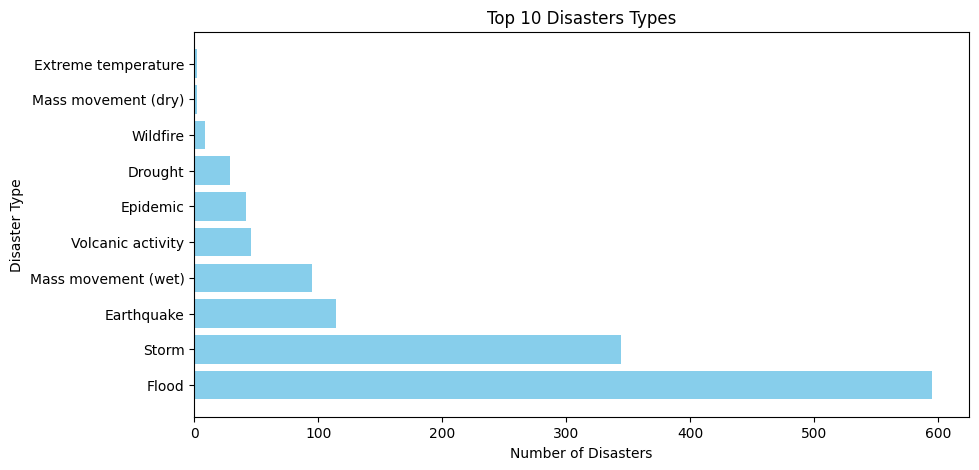

In [9]:
plt.figure(figsize=(10, 5))
plt.barh(disaters_count.index, disaters_count.values, color='skyblue')
plt.xlabel('Number of Disasters')
plt.ylabel('Disaster Type')
plt.title('Top 10 Disasters Types')
plt.show()

#### Insights: Most Common Types of Natural Disasters in Southeast Asia (2000 - Early 2024)

##### 1. **Floods Dominate as the Most Frequent Disaster**
- **Floods** are the most common natural disaster, with nearly **600 recorded events**.  
- This highlights that **Southeast Asia** faces significant vulnerability to flooding, likely due to:  
  - Monsoon seasons  
  - High rainfall levels  
  - Poor drainage infrastructure in certain areas.

##### 2. **Storms Follow Closely**
- **Storms** (including typhoons and hurricanes) rank second with approximately **350 recorded events**.  
- Coastal regions and island nations like the **Philippines, Vietnam, and Indonesia** are particularly prone to typhoons and tropical storms.
---

##### **Summary**
From 2000 to early 2024, **floods** and **storms** are by far the most common natural disasters in Southeast Asia, followed by **earthquakes**. This emphasizes the need for **flood management systems** and **storm preparedness** in the region, particularly in vulnerable coastal and riverine areas.


### 4.2 How do the geographic location (latitude, longitude) impact the total number of deaths and the number of people affected across Southeast Asia?


These lines of code just to make sure that we will just process with asean_countries

In [10]:
asean_countries = ['Vietnam', 'Thailand', 'Indonesia', 'Malaysia', 'Singapore',
                   'Philippines', 'Myanmar', 'Cambodia', 'Laos', 'Brunei', 'Timor-Leste']
df_asean = df[df['Country'].isin(asean_countries)]

In [11]:
# Drop rows with missing latitude or longitude
df_asean_no_na = df_asean.dropna(subset=['Latitude', 'Longitude'])

#### Visualize the relationships between Latitude, Longitude, Affected People and Total Deaths

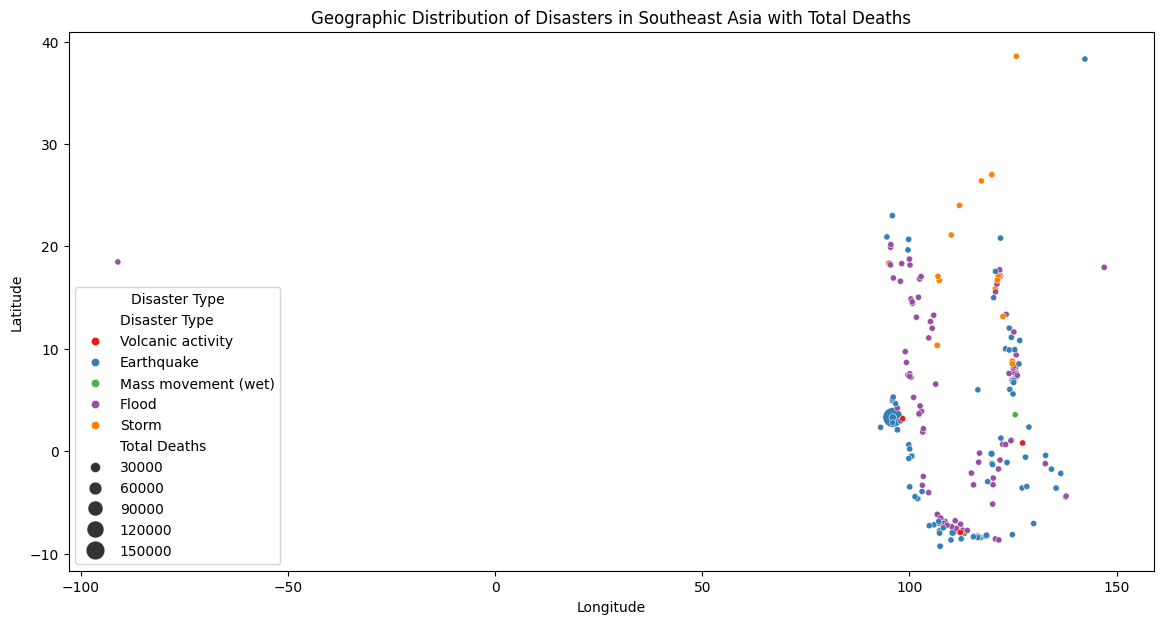

In [12]:
# relationship between latitude, longitude, total deaths
plt.figure(figsize=(14, 7))
sns.scatterplot(x='Longitude', y='Latitude', size='Total Deaths', hue='Disaster Type', data=df_asean_no_na, sizes=(20, 200), palette='Set1')
plt.title('Geographic Distribution of Disasters in Southeast Asia with Total Deaths')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Disaster Type')
plt.show()

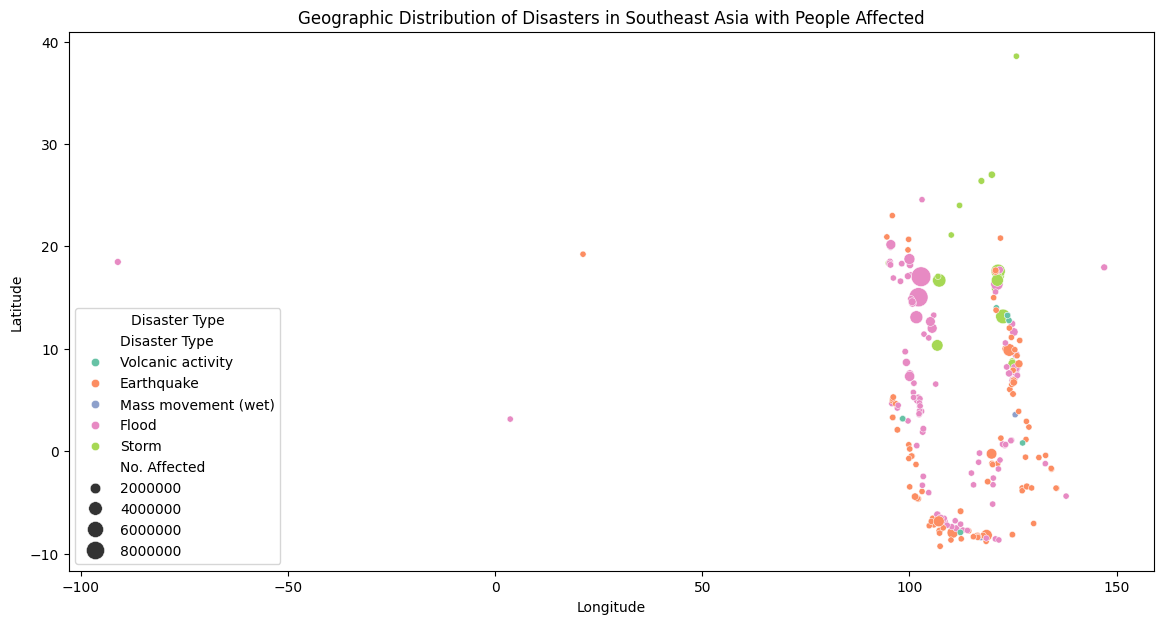

In [13]:
#  relationship between latitude, longitude, affected people
plt.figure(figsize=(14, 7))
sns.scatterplot(x='Longitude', y='Latitude', size='No. Affected', hue='Disaster Type', data=df_asean_no_na, sizes=(20, 200), palette='Set2')
plt.title('Geographic Distribution of Disasters in Southeast Asia with People Affected')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Disaster Type')
plt.show()

#### Insights: Geographic Distribution of Disasters in Southeast Asia

##### 1. **Concentration of Disasters**
- Most disaster events are clustered primarily between **longitudes 90° to 130°** and **latitudes -10° to 20°**.  
- This region likely corresponds to countries like **Indonesia, the Philippines, Thailand, and Myanmar**, which are prone to natural disasters.

##### 2. **Disaster Types**
- **Floods** (purple dots) are the most frequent disaster type, followed by **storms** (blue dots).  
  - These events are widely scattered, indicating their recurring and widespread nature.  
- **Earthquakes** (red dots) and **volcanic activity** (orange dots) are concentrated in specific areas, particularly near tectonic boundaries (e.g., **Indonesia and the Philippines**).  
- **Mass movement (wet)** (green dots) occurs relatively infrequently compared to other disaster types.

##### 3. **Total Deaths**
- The **dot size** (figure 1) indicates the severity of disasters based on the total number of deaths.  
  - Larger dots are observed in earthquake and storm events, which tend to cause the most fatalities.  
- Significant deaths are concentrated between **100°-120° longitude**, aligning with:  
  - **Indonesia’s earthquake-prone zones**.  
  - Typhoon pathways in the **Philippines**.

##### 4. **Severity Based on Population Affected**
- The size of the bubbles (figure 2) represents the number of people affected:  
  - **Floods** and **storms** cause the largest impacts in terms of affected populations, with several events impacting over **8 million people**.  
  - **Earthquakes** and **volcanic activity** tend to have smaller impacts on populations but remain regionally significant.

##### 5. **Geographic Hotspots**
- High-density disaster points are observed in **maritime Southeast Asia**, particularly in:  
  - **Indonesia**  
  - **The Philippines**  
- This highlights the vulnerability of island nations to disasters like earthquakes, volcanic eruptions, and typhoons.  
- Northern and central Southeast Asia also face periodic storms and floods.

##### 6. **Outliers**
- A few extreme events are represented by **large dots**, indicating catastrophic disasters.  
- These likely correspond to historic earthquakes, volcanic eruptions, or major storms with significant casualties.

---

##### **Summary**
Southeast Asia experiences frequent and diverse natural disasters.  
- **Floods** and **storms** are the most common types of disasters.  
- **Earthquakes** and **volcanic activity** contribute significantly to fatalities, especially in tectonically active regions like **Indonesia** and the **Philippines**.  
- Island nations face heightened vulnerability due to their geographic location, making disaster preparedness critical.


### 4.3 The level of impact of natural disasters in countries in recent times.
- (e.g., money, facilities, human.)






### 4.4 What is the trend of natural disaster occurrences over the years in Southeast Asia?
- (e.g., increasing, decreasing, or fluctuating patterns.)


### 4.5 Which provinces in Vietnam have the most storms and floods in a year? Calculated based on the last 3 years.


### 4.6 Can we construct a **machine learning classifier** to automatically determine the **severity level** of a disaster event based on multi-dimensional indicators?

## 5. Evaluate

# D. CONCLUSION

# E. REFERENCES